# 请求+获取网页数据	

In [1]:
import requests   # 导入requests包

url = 'https://book.douban.com/top250'
resp = requests.get(url)   # 用get向服务器请求获取数据
resp # 查看状态码，返回码418说明访问不成功，需要伪装访问，假装是人工打开网页

<Response [418]>

##  1. **状态码**：


    * 1开头：信息状态码
    * 2开头：成功状态码
    * 3开头：重定向状态码
    * 4开头：客户端错误状态码
    * 5开头：服务端错误状态码

In [9]:
resp.text

''

## 2. **```应对方式```**：

加入请求头headers，一般包括user-agent、cookie和referer等


- ```user-agent```：浏览器类型及版本、操作系统及版本、浏览器内核等的信息标识
- ```cookie```：用于识别用户身份、记录历史的一段数据（浏览器访问服务器后，服务器传给浏览器的）
- ```referer```：告诉服务器该网页是从哪个页面链接过来的

In [11]:
url = 'https://www.douban.com/people/selfcomm/statuses'

# 尝试加入user-agent
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) \
           Chrome/119.0.0.0 Safari/537.36 Edg/119.0.0.0',
        #    "Cookie":'bid=1kyjZbXoZMY; push_doumail_num=0; douban-fav-remind=1; ll="118281"; __utmz=30149280.1728568874.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); __utmv=30149280.5566; viewed="35801732"; push_noty_num=0; ct=y; _ck_desktop_mode=1; vmode=pc; __utma=30149280.402688281.1728568874.1732266293.1732276695.14; __utmc=30149280; frodotk_db="9678aadf6e91d70dc36a009e4bb58527"; ap_v=0,6.0; dbcl2="55661316:BuSu5/YVS6s"; ck=_Ekx; frodotk="cf37402f668544396da5c08e338fccab"; talionusr="eyJpZCI6ICI1NTY2MTMxNiIsICJuYW1lIjogInNlbGZjb21tIn0="'
           }
resp = requests.get(url, headers=headers)  # 设置参数headers
resp #返回码200说明访问成功

<Response [200]>

In [ ]:
# 查看返回内容，搜索该页面的“红楼梦”是否在返回的文本中，确认与网页一致
resp.text

'\n\n<!DOCTYPE html>\n<html lang="en">\n<head>\n  <meta charset="UTF-8">\n  \n  <title>登录豆瓣</title>\n  <style type="text/css">\n    #db-nav-sns{position:relative;zoom:1;background:#edf4ed}\n    #db-nav-sns .nav-primary{width:1040px;margin:0 auto;overflow:hidden;padding:22px 0 20px;zoom:1}\n    .account-wrap{width:1040px;margin:20px auto 0;overflow:hidden}\n    .account-main{float:left;width:590px}\n    .account-side{float:right;width:310px;color:#666}\n    \n  </style>\n  \n  <link type="text/css" rel="stylesheet" href="https://img1.doubanio.com/f/accounts/54b7917dfb44db20f23a40eab755be4ff6336a23/dist/passport/login/index.css" />\n\n</head>\n<body>\n  \n  <div id="account">\n    \n    \n<div id="db-nav-sns" class="nav">\n  <div class="nav-wrap">\n    <div class="nav-primary">\n      <a href="/">\n        <img src="https://img1.doubanio.com/f/accounts/4fd84763a74089b20eb02ba0225d6e7739d2c432/pics/passport/douban_logo@2x.png" width="142" alt="豆瓣">\n      </a>\n    </div>\n  </div>\n</div

: 

In [4]:
# 将返回内容放入html中，html为str
html = resp.text
html
type(html)

str

# 解析数据

In [9]:
from pyquery import PyQuery as pq #导入pyquery包


In [10]:

doc = pq(html) # 将html字符串转换为pyquery数据，便于解析
type(doc)   # 数据类型为pyquery.pyquery.PyQuery
doc.text()    # 数据变“干净”了

'豆瓣读书 Top 250\n!function(e){var o=function(o,n,t){var c,i,r=new Date;n=n||30,t=t||"/",r.setTime(r.getTime()+24*n*60*60*1e3),c="; expires="+r.toGMTString();for(i in o)e.cookie=i+"="+o[i]+c+"; path="+t},n=function(o){var n,t,c,i=o+"=",r=e.cookie.split(";");for(t=0,c=r.length;t<c;t++)if(n=r[t].replace(/^\\s+|\\s+$/g,""),0==n.indexOf(i))return n.substring(i.length,n.length).replace(/\\"/g,"");return null},t=e.write,c={"douban.com":1,"douban.fm":1,"google.com":1,"google.cn":1,"googleapis.com":1,"gmaptiles.co.kr":1,"gstatic.com":1,"gstatic.cn":1,"google-analytics.com":1,"googleadservices.com":1},i=function(e,o){var n=new Image;n.onload=function(){},n.src="https://www.douban.com/j/except_report?kind=ra022&reason="+encodeURIComponent(e)+"&environment="+encodeURIComponent(o)},r=function(o){try{t.call(e,o)}catch(e){t(o)}},a=/<script.*?src\\=["\']?([^"\'\\s>]+)/gi,g=/http:\\/\\/(.+?)\\.([^\\/]+).+/i;e.writeln=e.write=function(e){var t,l=a.exec(e);return l&&(t=g.exec(l[1]))?c[t[2]]?void r(e):void(

**目标信息源代码（部分）**

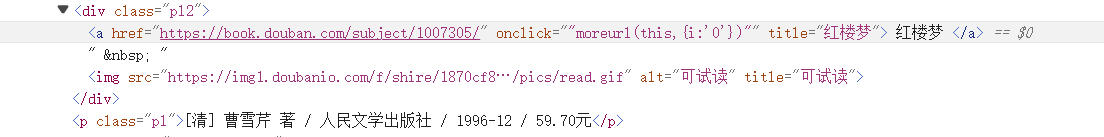

In [16]:
titles = doc('div.pl2 a') # 找到所有书名
print(titles)

<a href="https://book.douban.com/subject/1007305/" onclick="&quot;moreurl(this,{i:'0'})&quot;" title="&#x7EA2;&#x697C;&#x68A6;">
                红楼梦

                
              </a>



                  <a href="https://book.douban.com/subject/4913064/" onclick="&quot;moreurl(this,{i:'1'})&quot;" title="&#x6D3B;&#x7740;">
                活着

                
              </a>



                  <a href="https://book.douban.com/subject/24531956/" onclick="&quot;moreurl(this,{i:'2'})&quot;" title="&#x54C8;&#x5229;&#xB7;&#x6CE2;&#x7279;">
                哈利·波特

                
              </a>




              
                <a href="https://book.douban.com/subject/4820710/" onclick="&quot;moreurl(this,{i:'3'})&quot;" title="1984">
                1984

                
              </a>




              
                <a href="https://book.douban.com/subject/6518605/" onclick="&quot;moreurl(this,{i:'4'})&quot;" title="&#x4E09;&#x4F53;&#x5168;&#x96C6;">
                三体

In [14]:
for title in titles:
    print(pq(title).text())

红楼梦
活着
哈利·波特
1984
三体全集 : 地球往事三部曲
百年孤独
飘
动物农场
房思琪的初恋乐园
三国演义（全二册）
福尔摩斯探案全集（上中下）
白夜行
小王子
安徒生童话故事集
天龙八部
撒哈拉的故事
呐喊
邓小平时代
悉达多 : 一首印度的诗
杀死一只知更鸟
失踪的孩子 : 那不勒斯四部曲4
明朝那些事儿（1-9） : 限量版
新名字的故事 : 那不勒斯四部曲2
野草
沉默的大多数 : 王小波杂文随笔全编
